## Introduction


In this notebook, we have extracted the nifty minute wise data from 2008 to 2021 and then we made various indicators. Next we will check the significance of these filters and finally we will make trading decisions based on the best indicators, we will also make trading models based on combinations of these indicators.
In the end, we will select the model which will give the best results(Trading profits) on the test data.

Steps:

1) **Load Data:**
We had all the data in txt format and that too month wise, so I cleaned the data in txt format and arranged them year wise and here we extracted all the data and combined them together to make our main dataframe.

2) **Data Cleaning and Downcast:**
Checked if there are any extreme outliers and removed only the extreme visible outliers.

3) **Feature Generation (Indicators):**
We made 2 indicators manually and for the rest of the indicators we used the pre built technical analysis library to capture these indicator values.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import numpy as np
#import unirest
from matplotlib import rcParams
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import plotly.express as px
import os
%matplotlib inline
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

## Load Data 
Load and convert text data to dataframe.

In [2]:
# Check data
path ='/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2012/nifty2012.txt'
df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close']
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
df.index= df.Datetime
df.drop(['Date','Time','Datetime'],axis=1,inplace=True)
df.head()

,Symbol,Open,High,Low,Close
Datetime,,,,,
2012-01-02 09:16:00,NIFTY,4639.80,4643.25,4618.25,4621.35
2012-01-02 09:17:00,NIFTY,4621.55,4623.75,4616.40,4617.45
2012-01-02 09:18:00,NIFTY,4617.15,4628.30,4617.15,4628.30
2012-01-02 09:19:00,NIFTY,4627.95,4632.25,4626.15,4631.95
2012-01-02 09:20:00,NIFTY,4632.20,4633.50,4631.30,4632.90


For our model we will make a lot of features and indicators which will help us in making trading decisions.

We don't have the complete data of volume and OI, so we will drop those features as of now.

In [3]:
def load_data(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime'],axis=1,inplace=True)
    return df
def load_data2(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close','OI']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime','OI'],axis=1,inplace=True)
    return df
def load_data3(path):
    df = pd.read_csv(path, sep='\t', delimiter = ",", header=None)
    df.columns = ['Symbol', 'Date','Time', 'Open', 'High','Low','Close','Volume','OI']
    df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])
    df.index= df.Datetime
    df.drop(['Symbol','Date','Time','Datetime','OI','Volume'],axis=1,inplace=True)
    return df

path2008 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/Upto 2011/NIFTY upto 2011/nifty08-10.txt'
nifty08_10 = load_data(path2008)

path2011 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/Upto 2011/NIFTY upto 2011/nifty2011.txt'
nifty_2011 = load_data(path2011)
path2012 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2012/nifty2012.txt'
nifty_2012 = load_data(path2012)

path2013 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2013/nifty2013.txt'
nifty_2013 = load_data(path2013)
path2_2013 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2013/nifty2_2013.txt'
nifty2_2013 = load_data2(path2_2013)

path2014 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2014/nifty2014.txt'
nifty_2014 = load_data2(path2014)

path2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty2015.txt'
nifty2_2015 = load_data(path2015)  #month from march
path2_2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty2_2015.txt'
nifty_2015 = load_data2(path2_2015) #from jan
path3_2015 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2015/nifty3_2015.txt'
nifty3_2015 = load_data3(path3_2015)    #last months

path2016 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2016/nifty2016.txt'
nifty_2016 = load_data3(path2016)    #jan to july
path2_2016 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2016/nifty2_2016.txt'
nifty2_2016 = load_data(path2_2016)    #july to december

path2017 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2017/nifty2017.txt'
nifty_2017 = load_data2(path2017)

path2018 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2018/nifty2018.txt'
nifty_2018 = load_data2(path2018)
path2_2018 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2018/nifty2_2018.txt'
nifty2_2018 = load_data3(path2_2018)

path2019 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2019/nifty2019.txt'
nifty_2019 = load_data3(path2019)

path2020 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2020/nifty2020.txt'
nifty_2020 = load_data3(path2020)

path2021 = '/Users/adamyanayyar/Desktop/Intraday 1 Min Data/2021/nifty2021.txt'
nifty_2021 = load_data3(path2021)

nifty_2021.head()

,Open,High,Low,Close
Datetime,,,,
2021-01-01 09:08:00,13996.10,13996.10,13996.10,13996.10
2021-01-01 09:16:00,13997.90,14020.85,13991.35,14013.15
2021-01-01 09:17:00,14014.85,14018.55,14008.15,14009.05
2021-01-01 09:18:00,14008.05,14013.10,14005.05,14012.70
2021-01-01 09:19:00,14013.65,14019.10,14013.65,14016.20


In [4]:
all = ['nifty08_10','nifty_2011','nifty_2012','nifty_2013','nifty2_2013','nifty_2014','nifty2_2015',
       'nifty_2015','nifty3_2015','nifty_2016','nifty2_2016','nifty_2017','nifty_2018',
       'nifty2_2018','nifty_2019','nifty_2020','nifty_2021']
nifty_2011 = nifty08_10.append(nifty_2011)
data22 = nifty_2011.append(nifty_2012)
data22 = data22.append(nifty_2013)
data22 = data22.append(nifty2_2013)
data22 = data22.append(nifty_2014)
data22 = data22.append(nifty2_2015)
data22 = data22.append(nifty_2015)
data22 = data22.append(nifty3_2015)
data22 = data22.append(nifty_2016)
data22 = data22.append(nifty_2017)
data22 = data22.append(nifty_2018)
data22 = data22.append(nifty2_2018)
data22 = data22.append(nifty_2019)
data22 = data22.append(nifty_2020)
data22 = data22.append(nifty_2021)

nifty_data = data22.copy()
nifty_data.head(2)

,Open,High,Low,Close
Datetime,,,,
2008-01-01 09:55:00,6138.60,6154.60,6138.6,6148.9
2008-01-01 09:56:00,6149.75,6149.75,6132.8,6132.8


In [5]:
nifty_data.tail(2)

,Open,High,Low,Close
Datetime,,,,
2021-03-31 15:30:00,14689.85,14693.55,14689.45,14693.05
2021-03-31 15:31:00,14690.70,14690.70,14690.70,14690.70


Now, we have the nifty data minute wise from 2010 to 2021.

We also have the minute wise data of BankNifty but we will first try to make a model based solely on Nifty Historical prices and check our trading performance. Later we can add the bank features to our model and check if it improves our model performance.

In [6]:
def OHLC_resample(df,freq):
    sample = df.copy()
    d = pd.DataFrame(index = sample.resample(freq).last().dropna().index)
    d["Open"] = sample.resample(freq).first().dropna().Open
    d["High"] = sample.resample(freq).max().dropna().High
    d["Low"] = sample.resample(freq).min().dropna().Low
    d["Close"] = sample.resample(freq).last().dropna().Close
    return d

df = OHLC_resample(nifty_data,freq='15min')
df.head()

,Open,High,Low,Close
Datetime,,,,
2008-01-01 09:45:00,6138.60,6154.60,6113.55,6113.90
2008-01-01 10:00:00,6114.05,6130.65,6110.50,6123.55
2008-01-01 10:15:00,6124.85,6134.85,6123.45,6134.45
2008-01-01 10:30:00,6134.85,6136.85,6126.60,6132.35
2008-01-01 10:45:00,6133.30,6143.15,6133.30,6135.30


In [7]:
df.tail(2)

,Open,High,Low,Close
Datetime,,,,
2021-03-31 15:15:00,14700.00,14700.00,14676.05,14691.3
2021-03-31 15:30:00,14689.85,14693.55,14689.45,14690.7


In [8]:
# 15min sample will save us a lot of memory rather than 1min samples.
nifty_data.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1171281 entries, 2008-01-01 09:55:00 to 2021-03-31 15:31:00
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Open    1171281 non-null  float64
 1   High    1171281 non-null  float64
 2   Low     1171281 non-null  float64
 3   Close   1171281 non-null  float64
dtypes: float64(4)
memory usage: 44.7 MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82328 entries, 2008-01-01 09:45:00 to 2021-03-31 15:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82328 non-null  float64
 1   High    82328 non-null  float64
 2   Low     82328 non-null  float64
 3   Close   82328 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


(None, None)

### Downcast datatypes

In [9]:
# Let's downsample the datatypes from float64 to float32 to save some memory and faster operations.
def downcast(df):
    float_cols = [c for c in df if df[c].dtype == "float64"]
    df[float_cols] = df[float_cols].astype(np.float32)
    return df

df = downcast(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82328 entries, 2008-01-01 09:45:00 to 2021-03-31 15:30:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    82328 non-null  float32
 1   High    82328 non-null  float32
 2   Low     82328 non-null  float32
 3   Close   82328 non-null  float32
dtypes: float32(4)
memory usage: 1.9 MB
None


### Data Visualization and Removing Outliers

Text(0.5, 1.0, 'Nifty Movement')

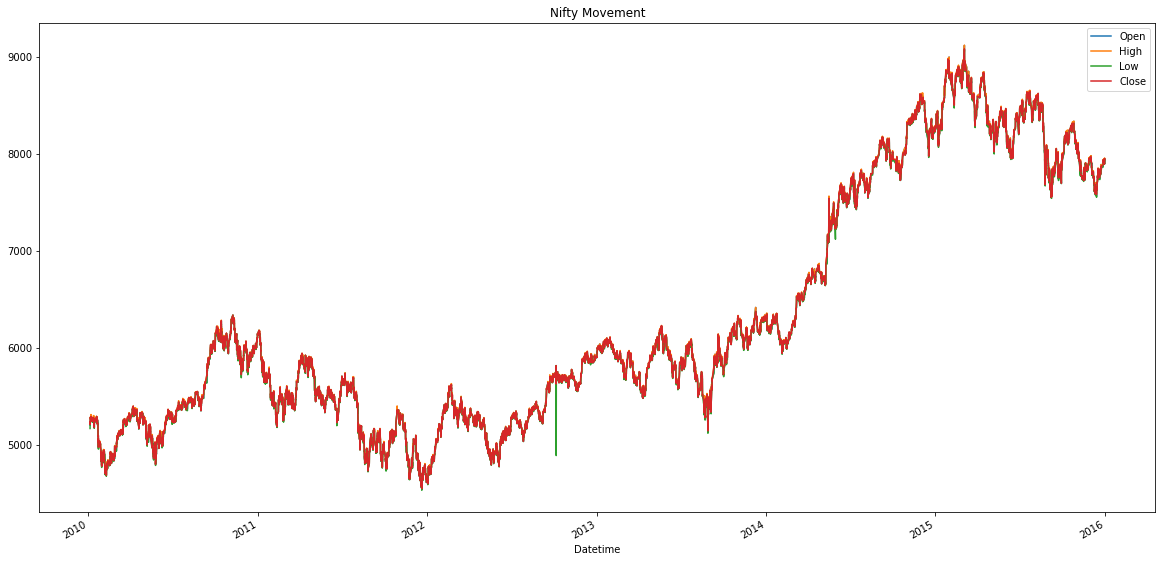

In [10]:
df.loc['2010':'2015'].plot(figsize=(20,10))
plt.title('Nifty Movement')

It looks like there are some outliers in 2012-2013. Let's check.

Text(0.5, 1.0, 'Nifty Movement')

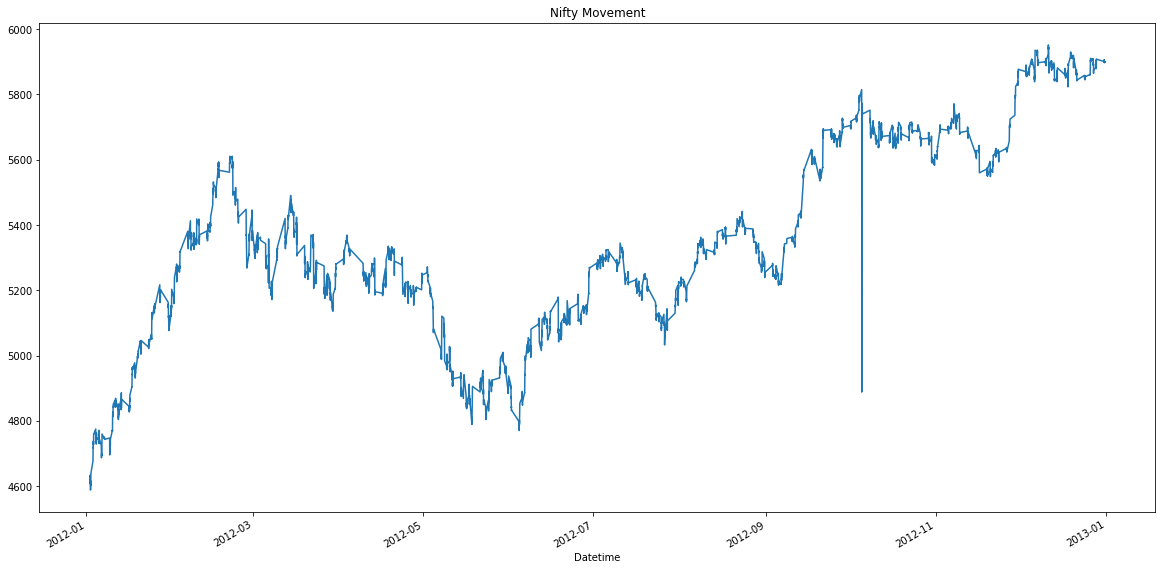

In [11]:
plt.figure(figsize=(20,10))
df.Low.loc['2012'].plot()
plt.title('Nifty Movement')

Could this be an outlier? We don't know but let's remove it any way for better functioning of our model.
Open and Low both shows this oulier.

### Removing Outliers
To avoid loss of information, we won't remove outliers from all the data. We will remove outliers from only the 10th month of 2012 and then merge it back to the main dataframe.

557/567 data points remain.


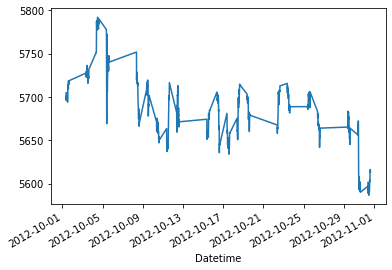

In [12]:
df2 =df.loc['2012-10']
y = df2['Low']
size= len(y)
removed_outliers = y.between(y.quantile(.008), y.quantile(.992))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot()

In [13]:
df['Low'].loc['2012-10'] = y[removed_outliers]

557/567 data points remain.


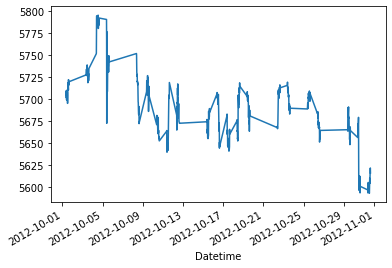

In [14]:
df3 =df.loc['2012-10']
y = df3['Open']
size= len(y)
removed_outliers = y.between(y.quantile(.008), y.quantile(.992))

print(str(y[removed_outliers].size) + "/" + str(size) + " data points remain.") 

y[removed_outliers].plot()

In [15]:
df['Open'].loc['2012-10'] = y[removed_outliers]

Text(0.5, 1.0, 'Nifty Movement')

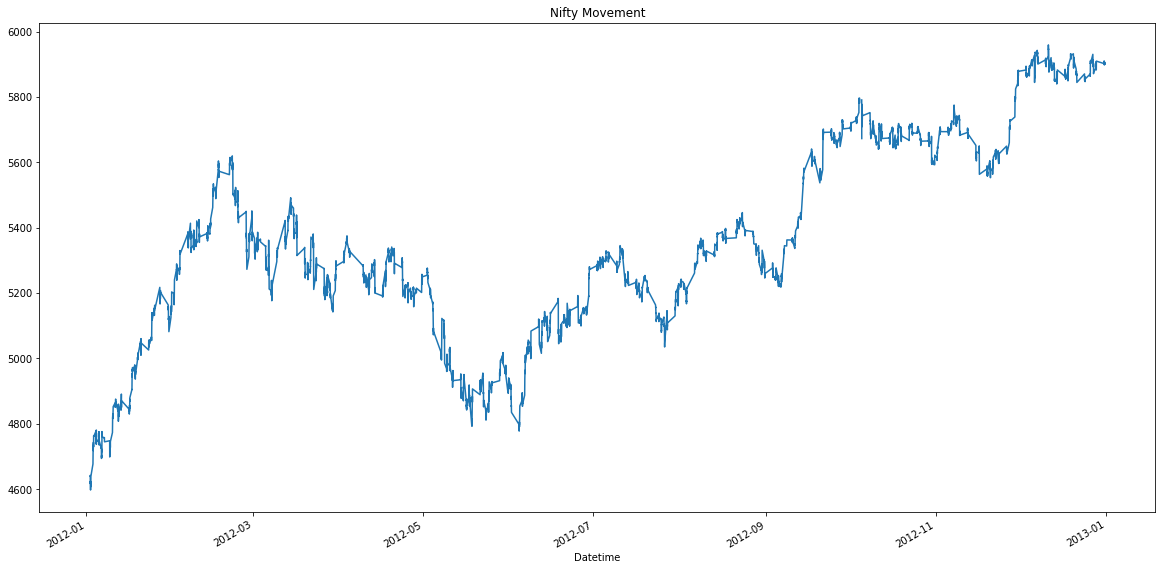

In [16]:
plt.figure(figsize=(20,10))
df.Open.loc['2012'].plot()
plt.title('Nifty Movement')

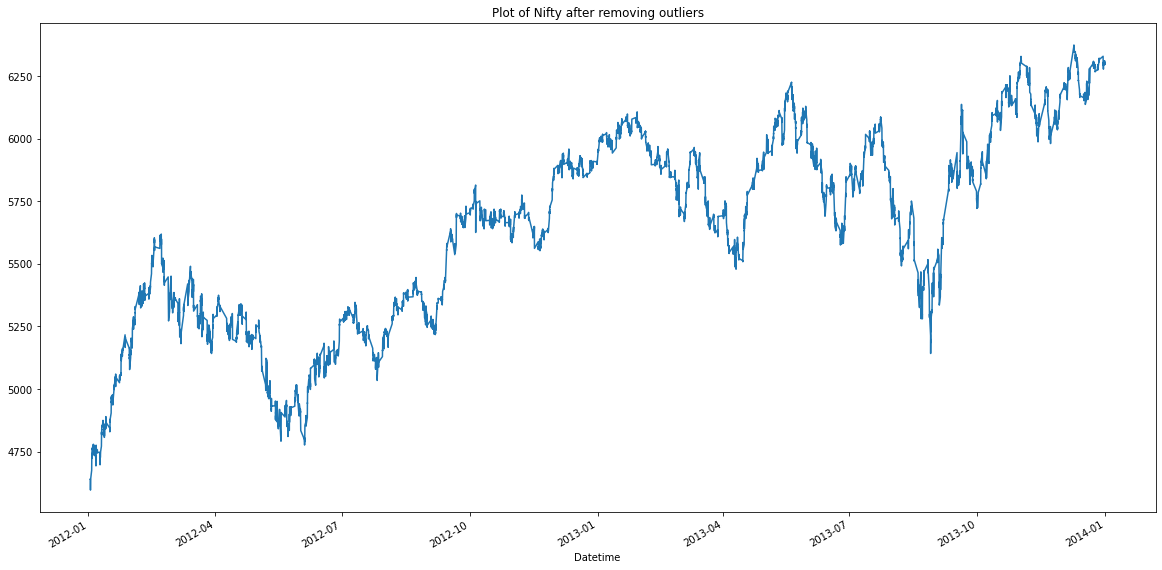

In [17]:
df.Close.loc['2012':'2013'].plot(figsize = (20,10))
plt.title("Plot of Nifty after removing outliers")
plt.show()

While making other predictors/indicators we will again get NaNs, if we keep on deleting NaN's after making every indicator, our data will shrink in size. So we will drop all the NaNs once all the indicators are created.

## Indicators



### Bollinger Band


In [18]:
# 27 observations for 1 day when we resample the data for 15min frame.
def bollinger_band(df):
    
    df1 = df.Close.to_frame()
    df["ma3"] = df1.iloc[:,0].rolling(81).mean()        # 3 days moving average
    df["ma7"] = df1.iloc[:,0].rolling(189).mean()       # 7 days moving average
    df['ma30'] = df1.iloc[:,0].rolling(810).mean()      # 30 days moving average
    df["std3"] = df1.iloc[:,0].rolling(81).std()        # 3 days standard deviation
    df["std7"] = df1.iloc[:,0].rolling(189).std()       # 7 days standard deviation
    df["std30"] = df1.iloc[:,0].rolling(810).std()       # 7 days standard deviation
    
    df["upper_band3"] = df.ma3 + (df.std3 * 2) 
    df["lower_band3"] = df.ma3 - (df.std3 * 2) 
    df["upper_band7"] = df.ma7 + (df.std7 * 2) 
    df["lower_band7"] = df.ma7 - (df.std7 * 2) 
    df["upper_band30"] = df.ma30 + (df.std30 * 2) 
    df["lower_band30"] = df.ma30 - (df.std30 * 2) 
    
    #Any deviation to these bands should be a sign of reversal.
    df["trade_upper_band3"] = df.ma3 + (df.std3 * 2.5) 
    df["trade_lower_band3"] = df.ma3 - (df.std3 * 2.5)
    df["trade_upper_band7"] = df.ma7 + (df.std7 * 2.5) 
    df["trade_lower_band7"] = df.ma7 - (df.std7 * 2.5)
    df["trade_upper_band30"] = df.ma30 + (df.std30 * 2.5) 
    df["trade_lower_band30"] = df.ma30 - (df.std30 * 2.5)
    
    #These will act as stop losses.
    df["exit_upper_band3"] = df.ma3 + (df.std3 * 3) 
    df["exit_lower_band3"] = df.ma3 - (df.std3 * 3)
    df["exit_upper_band7"] = df.ma7 + (df.std7 * 3) 
    df["exit_lower_band7"] = df.ma7 - (df.std7 * 3)
    df["exit_upper_band30"] = df.ma30 + (df.std30 * 3) 
    df["exit_lower_band30"] = df.ma30 - (df.std30 * 3)
    
    df["width3"] = df["upper_band3"] - df["lower_band3"]
    df["width7"] = df["upper_band7"] - df["lower_band7"]
    df["width30"] = df["upper_band30"] - df["lower_band30"]
    
    
    return df

In [19]:
df = bollinger_band(df)
df.head(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01 09:45:00,6138.600098,6154.600098,6113.549805,6113.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:00:00,6114.049805,6130.649902,6110.500000,6123.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:15:00,6124.850098,6134.850098,6123.450195,6134.450195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df = downcast(df)
df.head(2)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01 09:45:00,6138.600098,6154.600098,6113.549805,6113.899902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-01 10:00:00,6114.049805,6130.649902,6110.500000,6123.549805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### MACD Indicator

In [21]:
def macd(df,
         fast,
         slow,
         signal):
    
    df1 = df.Close.to_frame()
    df["ema_fast"] = df1.iloc[:,0].ewm(span=fast,min_periods=fast).mean()   #12 days
    df["ema_slow"] = df1.iloc[:,0].ewm(span=slow,min_periods=slow).mean()   #26 days
    df["macd"] = df.ema_fast - df.ema_slow
    df["signal"] = df["macd"].ewm(span=signal,min_periods=signal).mean()   #9 days
    
    return df

In [22]:
df = macd(df,324, 702, 243)   #27 observations in a day, so 324 for 12 days, 702 for 26days, 243 for 9 days.

## Indicators from Technical Analysis Library in Python

Now we will use the technical analysis library in Python to create all the other indicators.

https://therobusttrader.com/best-trend-following-indicators/ You can read more about indicators here.

### Momentum Indicators

https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators


In [23]:
from ta.momentum import AwesomeOscillatorIndicator,KAMAIndicator, ROCIndicator,RSIIndicator,StochRSIIndicator, TSIIndicator, WilliamsRIndicator


### Awesome Oscillator
It is a 34-period simple moving average, plotted through the central points of the bars (H+L)/2, and subtracted from the 5-period simple moving average, graphed across the central points of the bars (H+L)/2.

MEDIAN PRICE = (HIGH+LOW)/2

AO = SMA(MEDIAN PRICE, 5)-SMA(MEDIAN PRICE, 34)

where

SMA — Simple Moving Average.

 https://www.ifcm.co.uk/ntx-indicators/awesome-oscillator

In [24]:
#135 for 5 days, 908 for 34 days
sample = AwesomeOscillatorIndicator(df.High, df.Low, 135, 908, False)
df['AOI'] = sample.awesome_oscillator()
df.sample(5)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-06-14 10:00:00,5761.149902,5770.600098,5760.500000,5770.500000,5761.925293,5846.386719,6007.961426,44.994770,80.657799,116.321564,5851.915039,5671.935547,6007.702148,5685.071289,6240.604492,5775.318359,5874.412109,5649.438477,6048.031250,5644.742188,6298.765625,5717.157715,5896.909668,5626.940918,6088.360352,5604.413574,6356.926270,5658.996582,179.979080,322.631195,465.286255,5888.292835,5932.964197,-44.671362,2.941583,-175.851053
2009-01-13 15:30:00,2760.000000,2760.000000,2760.000000,2760.000000,2820.588379,2957.799805,2870.933350,56.959915,130.872559,154.188477,2934.508057,2706.668457,3219.544922,2696.054688,3179.310303,2562.556396,2962.988037,2678.188477,3284.981201,2630.618408,3256.404541,2485.462158,2991.468018,2649.708496,3350.417480,2565.182129,3333.498779,2408.367920,227.839661,523.490234,616.753906,2925.207420,2940.296676,-15.089256,-0.581392,69.500957
2008-02-04 14:30:00,5449.549805,5455.049805,5415.850098,5416.500000,5260.595215,5245.461426,NaN,140.342697,115.286270,NaN,5541.280273,4979.909668,5476.033691,5014.888672,NaN,NaN,5611.451660,4909.738281,5533.677246,4957.245605,NaN,NaN,5681.623047,4839.566895,5591.320312,4899.602539,NaN,NaN,561.370789,461.145081,NaN,5393.639797,NaN,NaN,NaN,NaN
2017-06-06 15:15:00,9634.250000,9640.650391,9632.599609,9635.349609,9659.802734,9633.503906,9447.448242,15.234330,27.172798,122.920952,9690.271484,9629.333984,9687.849609,9579.158203,9693.291016,9201.606445,9697.888672,9621.716797,9701.435547,9565.571289,9754.750977,9140.146484,9705.505859,9614.099609,9715.022461,9551.985352,9816.211914,9078.685547,60.937321,108.691193,491.683807,9576.990445,9480.079553,96.910892,86.168392,230.657423
2010-12-13 10:15:00,5874.000000,5879.700195,5872.250000,5877.850098,5856.878906,5937.837891,6018.638184,45.512096,80.065369,151.425323,5947.903320,5765.854980,6097.968750,5777.707031,6321.489258,5715.787598,5970.659180,5743.098633,6138.001465,5737.674316,6397.201660,5640.075195,5993.415527,5720.342773,6178.033691,5697.641602,6472.914551,5564.362305,182.048386,320.261475,605.701294,5919.881641,5964.701662,-44.820020,-37.304581,-114.510045


### Kaufman’s Adaptive Moving Average (KAMA)

Moving average designed to account for market noise or volatility. KAMA will closely follow prices when the price swings are relatively small and the noise is low. KAMA will adjust when the price swings widen and follow prices from a greater distance. This trend-following indicator can be used to identify the overall trend, time turning points and filter price movements.

https://www.tradingview.com/ideas/kama/

In [48]:
sample = KAMAIndicator(df.Close, 10, 10, 30, False)   #10 days , 7 days, 30days
df['KAMA_FAST'] = sample.kama()
sample2 = KAMAIndicator(df.Close, 10, 50, 30 , False)   # 10, 3, 30
df['KAMA_SLOW'] = sample2.kama()
#df.sample(3)

### ROC Indicator

The ROC calculation compares the current price with the price “n” periods ago. The plot forms an oscillator that fluctuates above and below the zero line as the Rate-of-Change moves from positive to negative. As a momentum oscillator, ROC signals include centerline crossovers, divergences and overbought-oversold readings. 

https://school.stockcharts.com/doku.php?id=technical_indicators:rate_of_change_roc_and_momentum

In [55]:
sample = ROCIndicator(df.Close, 324, False)  #12*27 =324 12days  
df['ROC'] = sample.roc()
#df.sample(3)

### Relative Strength Index (RSI)

Compares the magnitude of recent gains and losses over a specified time period to measure speed and change of price movements of a security. It is primarily used to attempt to identify overbought or oversold conditions in the trading of an asset.

https://www.investopedia.com/terms/r/rsi.asp

In [27]:
sample = RSIIndicator(df.Close, 14, False)  #14*27 =378 14days relative strength index 
df['RSI'] = sample.rsi()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA_FAST,KAMA_SLOW,ROC,RSI
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-10-19 14:30:00,10301.75,10320.500000,10287.900391,10289.049805,10497.521484,10432.050781,10987.334961,119.698860,120.543480,456.730896,10736.918945,10258.123047,10673.137695,10190.963867,11900.796875,10073.873047,10796.768555,10198.273438,10733.409180,10130.691406,12129.162109,9845.507812,10856.617188,10138.424805,10793.680664,10070.419922,12357.528320,9617.142578,478.795441,482.173920,1826.923584,10557.242626,10796.527225,-239.284599,-230.593249,-599.228064,10431.146683,10483.743016,-5.071184,35.352819
2009-05-05 10:45:00,3646.00,3673.649902,3644.149902,3665.649902,3497.179688,3443.610107,3103.735352,104.873199,92.681236,309.915405,3706.926025,3287.433105,3628.972412,3258.247559,3723.566162,2483.904541,3759.362549,3234.996582,3675.313232,3211.906982,3878.523926,2328.946777,3811.799316,3182.560059,3721.653809,3165.566406,4033.481689,2173.989258,419.492798,370.724945,1239.661621,3396.431888,3232.194415,164.237472,149.499221,420.465977,3552.485706,3454.358010,13.008292,74.122479
2018-05-09 13:00:00,10737.50,10757.099609,10736.299805,10754.299805,10694.746094,10700.919922,10467.243164,40.137699,41.196114,208.242737,10775.021484,10614.470703,10783.311523,10618.527344,10883.728516,10050.757812,10795.089844,10594.401367,10803.910156,10597.929688,10987.849609,9946.636719,10815.159180,10574.333008,10824.507812,10577.331055,11091.971680,9842.514648,160.550797,164.784454,832.970947,10648.869121,10557.452678,91.416443,84.710010,257.901974,10702.978457,10669.926850,2.120404,67.669847


### Stochastic RSI

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security’s historical performance rather than a generalized analysis of price change.

https://school.stockcharts.com/doku.php?id=technical_indicators:stochrsi https://www.investopedia.com/terms/s/stochrsi.asp

In [89]:
sample = StochRSIIndicator(df.Close, 378,81,81, False)  #window 14days , smooth_window 3days
df['STOCH_RSI'] = sample.stochrsi()
df['STOCH_RSI3'] = sample.stochrsi_k()
sample2 = StochRSIIndicator(df.Close, 378, 270, 270, False)
df['STOCH_RSI10'] = sample2.stochrsi_k()
#df.sample(3)

### True strength index (TSI)

Shows both trend direction and overbought/oversold conditions.

https://school.stockcharts.com/doku.php?id=technical_indicators:true_strength_index

In [109]:
sample = TSIIndicator(df.Close, 675,351, False)  #slow=25days , fast = 13days
df['TSI_SLOW'] = sample.tsi()
sample2 = TSIIndicator(df.Close, 25,13, False)  #slow=25days , fast = 13days
df['TSI_FAST'] = sample2.tsi()
#df.sample(3)

### Williams %R

Readings from 0 to -20 are considered overbought. Readings from -80 to -100 are considered oversold.

%R = (Highest High - Close)/(Highest High - Lowest Low) * -100

Lowest Low = lowest low for the look-back period Highest High = highest high for the look-back period %R is multiplied by -100 correct the inversion and move the decimal.

https://school.stockcharts.com/doku.php?id=technical_indicators:williams_r

The Williams %R oscillates from 0 to -100. When the indicator produces readings from 0 to -20, this indicates overbought market conditions. When readings are -80 to -100, it indicates oversold market conditions.

In [121]:
sample = WilliamsRIndicator(df.High, df.Low, df.Close, 378, False)  #14days
df['WRI_SLOW'] = sample.williams_r()
sample2 = WilliamsRIndicator(df.High, df.Low, df.Close, 14, False)  #14days
df['WRI_FAST'] = sample2.williams_r()
#df.sample(2)

### Volatility Indicators


In [31]:
from ta.volatility import AverageTrueRange, DonchianChannel

**Average True Range (ATR)**

The indicator provide an indication of the degree of price volatility. Strong moves, in either direction, are often accompanied by large ranges, or large True Ranges.

http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_true_range_atr

The most common trading approach involving moving averages is to assume that the trend is positive if the average has a positive slope, and the price trades above it, with the opposite conditions applying for a negative trend. When using moving averages to determine the direction of the trend, it’s often done long term, using the 200-period moving average.

You may also use two moving averages in conjunction to create a cross over signals. One of the most well-known examples involves a crossover by the 50-period moving average over the 200-period moving average, which is called a golden cross.


In [132]:
sample = AverageTrueRange(df.High, df.Low, df.Close, 378, False)  #14days
df['ATR'] = sample.average_true_range()
sample2 = AverageTrueRange(df.High, df.Low, df.Close, 14, False)  #14days
df['ATR2'] = sample2.average_true_range()
#df.sample(2)

**Donchian Channel**

https://www.investopedia.com/terms/d/donchianchannels.asp

The indicator itself is very simple, and consists of a lower and an upper band, which are made up of the 20-bar high, and the 20-bar low.

As soon as the market breaks out above the upper band, or below the lower band, it’s interpreted as a signal to enter a position in the direction of the breakout.

However, of course, this is just the basic setup, and to turn it into a working trading strategy, you’ll have to add more filters and conditions to get rid of a lot of false signals.

In [33]:
sample = DonchianChannel(df.High, df.Low, df.Close, 540,0, False)  #window 20 days
df['DC_HB'] = sample.donchian_channel_hband()   # DC High Band
df['DC_LB'] = sample.donchian_channel_lband()   # DC Low Band
df['DC_MB'] = sample.donchian_channel_mband()   # DC Middle Band
df.sample(2)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA_FAST,KAMA_SLOW,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI,ATR,DC_HB,DC_LB,DC_MB,DC_PB,DC_WB
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-08-27 15:30:00,5350.299805,5351.450195,5348.850098,5351.100098,5395.845215,5392.546387,5265.349609,26.430828,22.758556,100.450066,5448.706543,5342.983398,5438.063477,5347.029297,5466.249512,5064.449219,5461.922363,5329.768066,5449.442871,5335.650391,5516.474609,5014.224609,5475.137695,5316.552734,5460.822266,5324.270996,5566.699707,4963.999512,105.723312,91.034225,401.800262,5359.895428,5306.039437,53.855991,48.642312,131.190046,5383.859648,5369.118992,0.373272,27.579289,0.013204,0.645852,5.332516,-51.930759,9.337811,5448.600098,5077.500000,5263.050049,0.737268,6.990723
2008-11-28 10:30:00,2742.399902,2757.350098,2737.100098,2757.250000,2695.285889,2681.607910,3034.698730,46.428810,71.538414,354.119019,2788.143311,2602.428223,2824.684814,2538.531006,3742.936768,2326.460693,2811.357910,2579.213867,2860.454102,2502.761963,3919.996094,2149.401123,2834.572266,2555.999268,2896.223145,2466.992676,4097.055664,1972.341553,185.715240,286.153656,1416.476074,2778.079817,3002.551182,-224.471365,-248.315865,-473.469539,2692.478607,2739.543139,-4.830524,64.404154,0.747657,0.643978,-6.570152,-65.438331,28.999780,3254.199951,2253.949951,2754.074951,0.503174,35.315150
2012-10-05 09:45:00,5768.299805,5774.899902,NaN,5625.600098,5744.590820,5707.896484,5478.654297,37.135738,44.055302,177.719635,5818.862305,5670.319336,5796.006836,5619.785645,5834.093750,5123.215332,5837.430176,5651.751465,5818.034668,5597.757812,5922.953613,5034.355469,5855.998047,5633.183594,5840.062012,5575.730469,6011.813477,4945.495605,148.542953,176.221207,710.878540,5660.429961,5550.442099,109.987862,94.131598,NaN,5739.841009,5688.838303,0.212877,18.451395,0.000000,0.671281,10.603318,NaN,10.034491,5815.350098,NaN,NaN,NaN,NaN


### Trend Indicators

In [34]:
from ta.trend import AroonIndicator, ADXIndicator

**Aroon Indicator**

Well, Aroon consists of two separate parts, which are “Aron-Up”, and “Aroon-Down”.

Aroon-up measures the number of bars since the last 25-bar high, while Aroon down measures the number of bars since the last 25-bar low.

While the logic might seem similar to what’s used in other momentum indicators, such as stochastics, Aroon remains special because it not only takes into account the actual position of the close relative to the previous highs and lows, but also the time that has passed.

Identify when trends are likely to change direction.

Aroon Up = ((N - Days Since N-day High) / N) x 100 Aroon Down = ((N - Days Since N-day Low) / N) x 100 Aroon Indicator = Aroon Up - Aroon Down

https://www.investopedia.com/terms/a/aroon.asp

**Interpretation**

When interpreting the indicator, you generally say that there are three stages to an emerging signal:

The first stage is when Aroon Up is above Aroon down. Bearing the original definition of the indicator in mind, this shows us that highs have been more recent than lows.
In the second stage, the Aroon-up line should move up above 50, while the Aroon-down line should move below 50.
The final stage occurs when Arron-up goes up to 100, indicating that a new high has been made, while Arron-down remains on very low levels.

In [35]:
sample = AroonIndicator(df.Close, 675, False)  #25days
df['AI_D'] = sample.aroon_down()
df['AI_I'] = sample.aroon_indicator()
df['AI_U'] = sample.aroon_up()
df.sample(3)

,Open,High,Low,Close,ma3,ma7,ma30,std3,std7,std30,upper_band3,lower_band3,upper_band7,lower_band7,upper_band30,lower_band30,trade_upper_band3,trade_lower_band3,trade_upper_band7,trade_lower_band7,trade_upper_band30,trade_lower_band30,exit_upper_band3,exit_lower_band3,exit_upper_band7,exit_lower_band7,exit_upper_band30,exit_lower_band30,width3,width7,width30,ema_fast,ema_slow,macd,signal,AOI,KAMA_FAST,KAMA_SLOW,ROC,RSI,STOCH_RSI,STOCH_RSI3,TSI,WRI,ATR,DC_HB,DC_LB,DC_MB,DC_PB,DC_WB,AI_D,AI_I,AI_U
Datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-18 12:00:00,14275.450195,14303.849609,14266.299805,14302.900391,14500.870117,14449.556641,13883.250000,90.516182,129.030792,401.148529,14681.902344,14319.836914,14707.618164,14191.495117,14685.547852,13080.953125,14727.160156,14274.579102,14772.132812,14126.979492,14886.122070,12880.378906,14772.417969,14229.321289,14836.648438,14062.463867,15086.696289,12679.804688,362.064728,516.123169,1604.594116,14301.530742,13977.031660,324.499082,321.960612,711.633744,14436.940511,14359.253520,2.355126,34.205410,0.047136,0.417638,11.594720,-44.450720,29.340711,14653.349609,13131.450195,13892.399902,0.769729,10.815624,28.148148,58.370370,86.518519
2008-06-06 10:00:00,4707.399902,4707.399902,4673.549805,4675.250000,4669.179199,4793.236328,4994.699707,59.101448,116.379936,151.350494,4787.381836,4550.976074,5025.996094,4560.476562,5297.400879,4691.998535,4816.932617,4521.425293,5084.186035,4502.286621,5373.076172,4616.323730,4846.483398,4491.874512,5142.375977,4444.096191,5448.751465,4540.648438,236.405792,465.519745,605.401978,4845.921337,4919.469856,-73.548519,-18.775299,-211.451688,4696.149740,4803.105148,-8.613341,57.186485,0.263240,0.089975,-3.481842,-78.043963,19.070447,5254.399902,4536.850098,4895.625000,0.192878,14.429795,98.222222,-75.407407,22.814815
2021-02-19 11:45:00,15071.700195,15110.849609,15070.700195,15078.150391,15205.361328,15208.693359,14667.347656,81.255753,93.487633,443.441254,15367.873047,15042.850586,15395.667969,15021.717773,15554.229492,13780.464844,15408.500977,15002.222656,15442.412109,14974.973633,15775.950195,13558.744141,15449.128906,14961.594727,15489.156250,14928.230469,15997.670898,13337.023438,325.023010,373.950531,1773.765015,15052.363110,14754.234683,298.128427,288.296083,628.694733,15193.518729,15118.956373,1.841205,41.755584,0.560232,0.770796,8.261325,-21.385562,35.896196,15431.750000,13596.750000,14514.250000,0.807303,12.427842,42.222222,44.296296,86.518519


In [37]:
df = downcast(df)  #all datatypes to float32

In [38]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79908 entries, 2008-03-05 14:00:00 to 2021-03-31 15:30:00
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                79908 non-null  float32
 1   High                79908 non-null  float32
 2   Low                 79908 non-null  float32
 3   Close               79908 non-null  float32
 4   ma3                 79908 non-null  float32
 5   ma7                 79908 non-null  float32
 6   ma30                79908 non-null  float32
 7   std3                79908 non-null  float32
 8   std7                79908 non-null  float32
 9   std30               79908 non-null  float32
 10  upper_band3         79908 non-null  float32
 11  lower_band3         79908 non-null  float32
 12  upper_band7         79908 non-null  float32
 13  lower_band7         79908 non-null  float32
 14  upper_band30        79908 non-null  float32
 15  lower_band30      

## Data Visualization

### RSI VS CLOSE PRICE

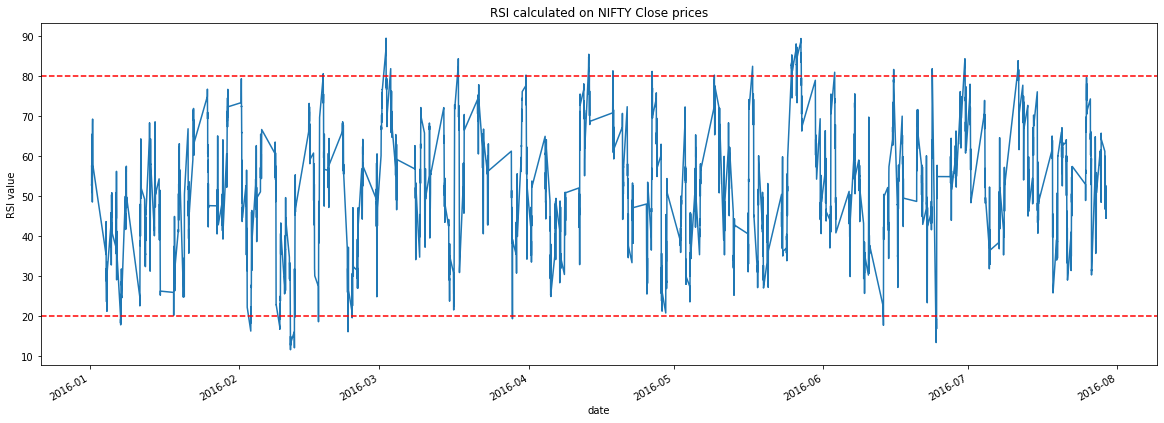

In [39]:
df.RSI.loc['2016'].plot(figsize = (20,7))

upper_thresh = 80
lower_thresh = 20

plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')

plt.title("RSI calculated on NIFTY Close prices")
plt.ylabel("RSI value")
plt.xlabel("date")
plt.show()

Below 20 is the over sold area where we should look to buy and above 80 is overbought area where we should look to short.
We can see we will get few but profitable trading opportunities if we trade by solely on RSI index. We can also tweek the Threshold values to trade more.

### Bollinger Band VS Close Price

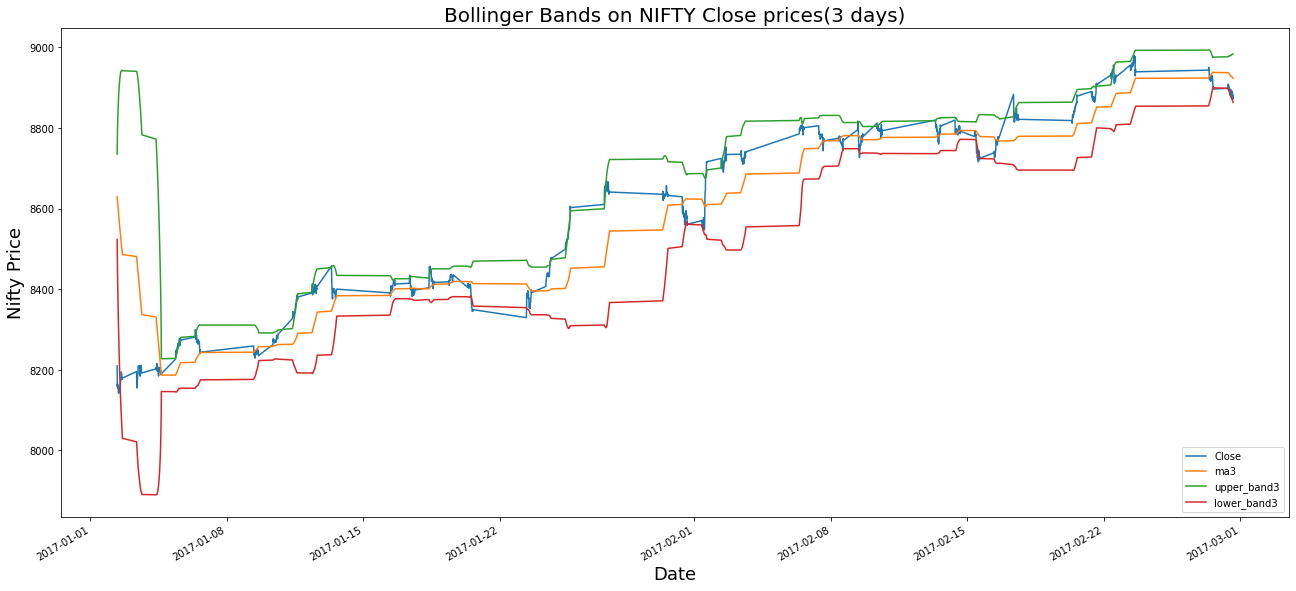

In [119]:
df[['Close','ma3','upper_band3','lower_band3']].loc['2017-01':'2017-02'].plot(figsize=(22,10))
plt.title("Bollinger Bands on NIFTY Close prices(3 days)", fontsize=20)
plt.ylabel("Nifty Price", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

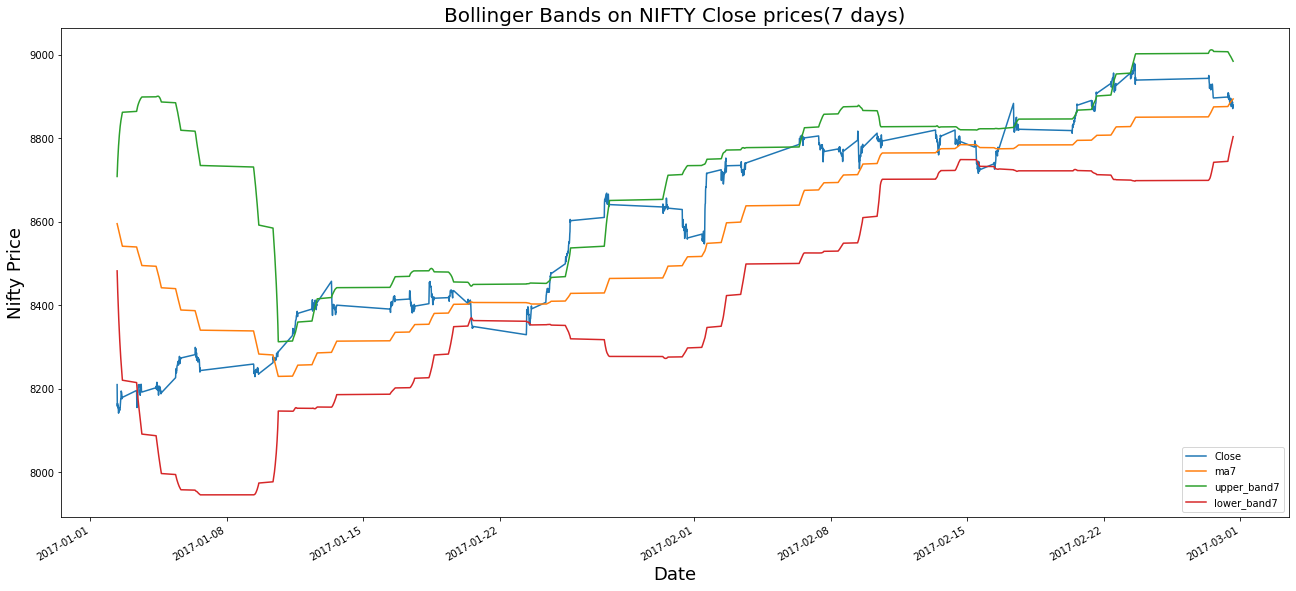

In [118]:
df[['Close','ma7','upper_band7','lower_band7']].loc['2017-01':'2017-2'].plot(figsize=(22,10))
plt.title("Bollinger Bands on NIFTY Close prices(7 days)", fontsize=20)
plt.ylabel("Nifty Price", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

When the price of the asset breaks below the lower band of the Bollinger Bands®, prices have perhaps fallen too much and are due to bounce. On the other hand, when price breaks above the upper band, the market is perhaps overbought and due for a pullback.

Using the bands as overbought/oversold indicators relies on the concept of mean reversion of the price. Mean reversion assumes that, if the price deviates substantially from the mean or average, it eventually reverts back to the mean price.

In range-bound markets, mean reversion strategies can work well, as prices travel between the two bands like a bouncing ball. However, Bollinger Bands® don't always give accurate buy and sell signals. During a strong trend, for example, the trader runs the risk of placing trades on the wrong side of the move because the indicator can flash overbought or oversold signals too soon.

To help remedy this, a trader can look at the overall direction of price and then only take trade signals that align the trader with the trend. For example, if the trend is down, only take short positions when the upper band is tagged. The lower band can still be used as an exit if desired, but a new long position is not opened since that would mean going against the trend. 

### MACD VS Close Price

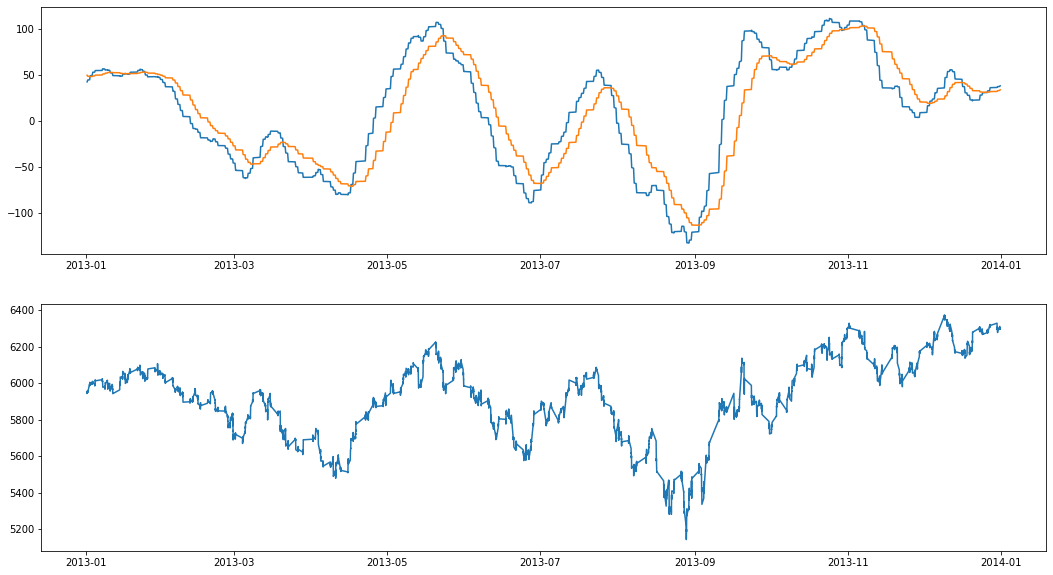

In [42]:
fig = plt.figure(figsize = (18,10))
ax1, ax2 = fig.subplots(2, 1)
ax1.plot(df.loc['2013'][['macd','signal']])
ax2.plot(df.Close.loc['2013'])

As you can see from the chart above, many traders will watch for a short-term moving average (blue line) to cross above a longer-term moving average (red line) and use this to signal increasing upward momentum. This bullish crossover suggests that the price has recently been rising at a faster rate than it has in the past, so it is a common technical buy sign. Conversely, a short-term moving average crossing below a longer-term average is used to illustrate that the asset's price has been moving downward at a faster rate and that it may be a good time to sell.

### AOI (Awesome Oscillator Indicator) VS Close Price

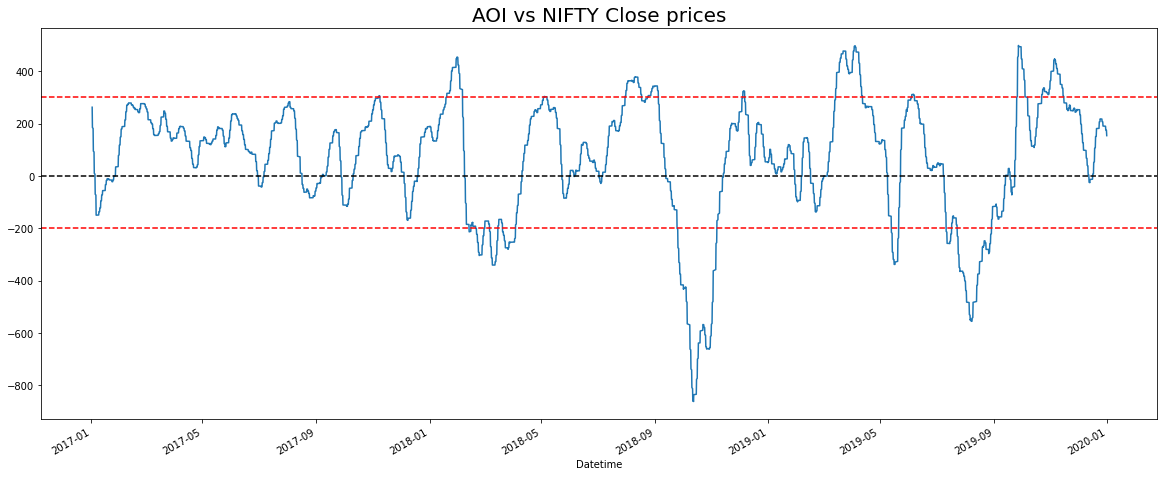

In [44]:
df.AOI.loc['2017':'2019'].plot(figsize=(20,8))
upper_thresh = 300
lower_thresh = -200
zero_cross = 0

plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(zero_cross, 0, 1,c = "black",linestyle='--')

plt.title("AOI vs NIFTY Close prices", fontsize=20)
plt.show()

When AO crosses above the Zero Line, short term momentum is now rising faster than the long term momentum. This can present a bullish buying opportunity.

When AO crosses below the Zero Line, short term momentum is now falling faster then the long term momentum. This can present a bearish selling opportunity.

AO (momentum) can be used in some instances to generate quality signals but much like with any signal generating indicator, it should be used with caution. Truly understanding the setups and avoiding false signals is something that the best traders learn through experience over time. That being said, the Awesome Indicator produces quality information and may be a valuable technical analysis tool for many analysts or traders.

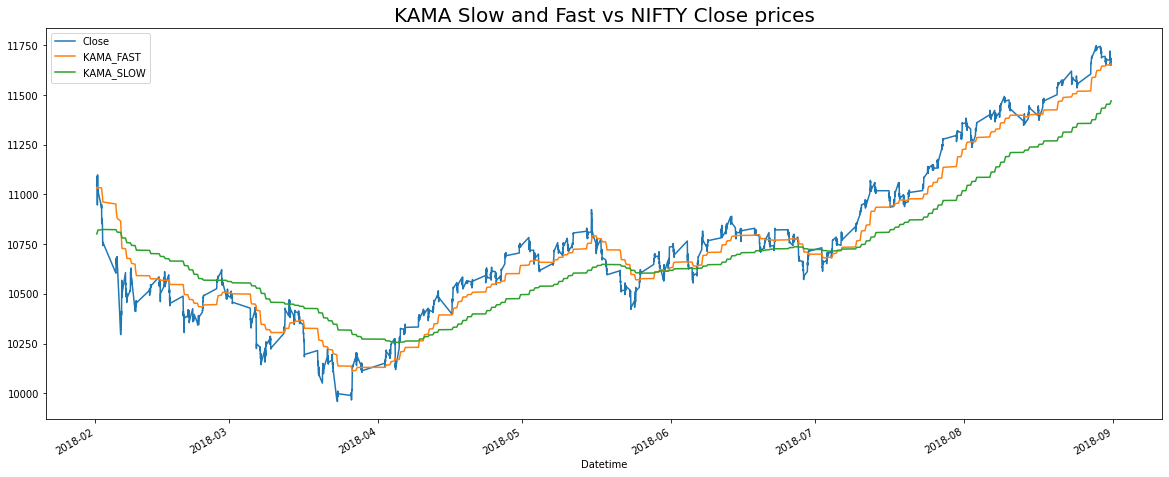

In [50]:
df[['Close','KAMA_FAST','KAMA_SLOW']].loc['2018-02':'2018-08'].plot(figsize=(20,8))
plt.title("KAMA Slow and Fast vs NIFTY Close prices", fontsize=20)
plt.show()

One of the uses of Kaufman’s Adaptive Moving Average is to identify the general trend of current market price action. Basically, when the KAMA indicator line is moving lower, it indicates the existence of a downtrend. On the other hand, when the KAMA line is moving higher, it shows an uptrend. As compared to the Simple Moving Average, the KAMA indicator is less likely to generate false signals that may cause a trader to incur losses.

Kaufman’s Adaptive Moving Average can also be used to spot the beginning of new trends and pinpoint trend reversal points. One way to do this is by plotting two KAMA lines on a chart – one with a more short-term moving average and another with a longer-term moving average. When a faster KAMA line crosses above a slower KAMA line, this indicates a change from a downtrend to an uptrend. The trader can take a long position and close the trade when the faster MA line crosses back to beneath the slower MA line. Trading signals can also be derived by the movement of market price in relation to Kaufman’s Adaptive Moving Average. If price crosses from below to above the KAMA line, that is a bullish (buy) signal. Conversely, price falling from above the KAMA line to below it is a bearish (sell) signal.

### ROC VS Close Price

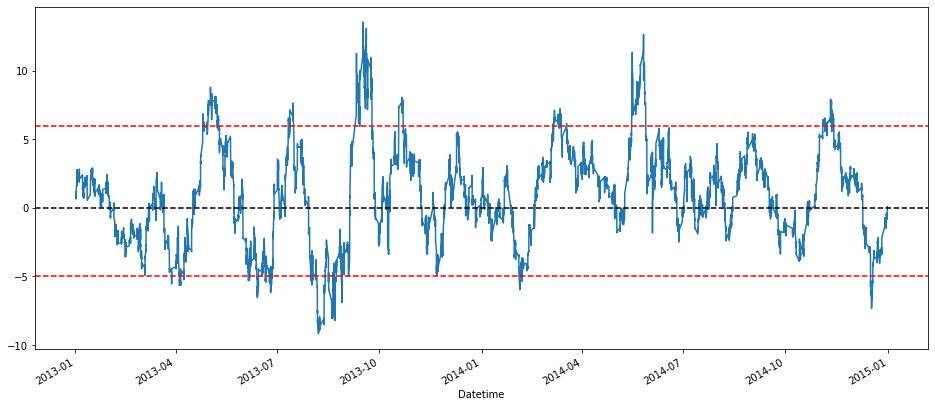

In [65]:
df.ROC.loc['2013':'2014'].plot(figsize=(16,7))
upper_thresh = 6
lower_thresh = -5
zero_cross = 0

plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(zero_cross, 0, 1,c = "black",linestyle='--')
plt.show()

The ROC is prone to whipsaws, especially around the zero line. Therefore, this signal is generally not used for trading purposes, but rather to simply alert traders that a trend change may be underway.

Overbought and oversold levels are also used. These levels are not fixed, but will vary by the asset being traded. Traders look to see what ROC values resulted in price reversals in the past. Often traders will find both positive and negative values where the price reversed with some regularity. When the ROC reaches these extreme readings again, traders will be on high alert and watch for the price to start reversing to confirm the ROC signal. With the ROC signal in place, and the price reversing to confirm the ROC signal, a trade may be considered.

One potential problem with using the ROC indicator is that its calculation gives equal weight to the most recent price and the price from n periods ago, despite the fact that some technical analysts consider more recent price action to be of more importance in determining likely future price movement.

### StochRSI vs Close Price

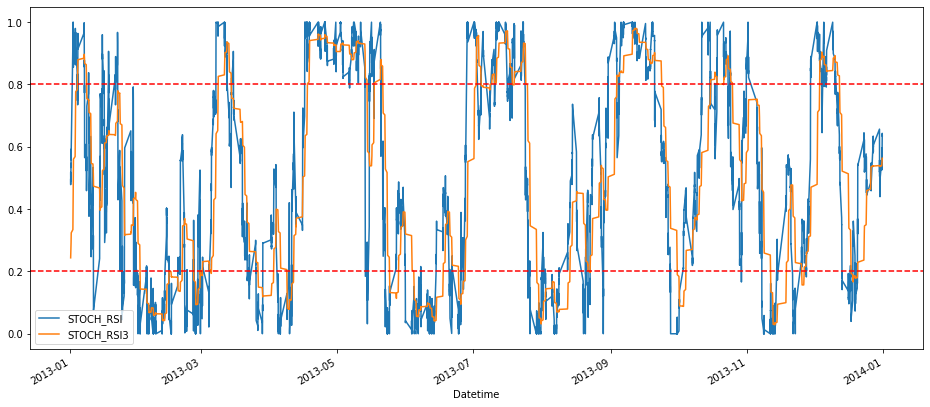

In [88]:
df[['STOCH_RSI','STOCH_RSI3']].loc['2013'].plot(figsize=(16,7))
upper_thresh = 0.8
lower_thresh = 0.2


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

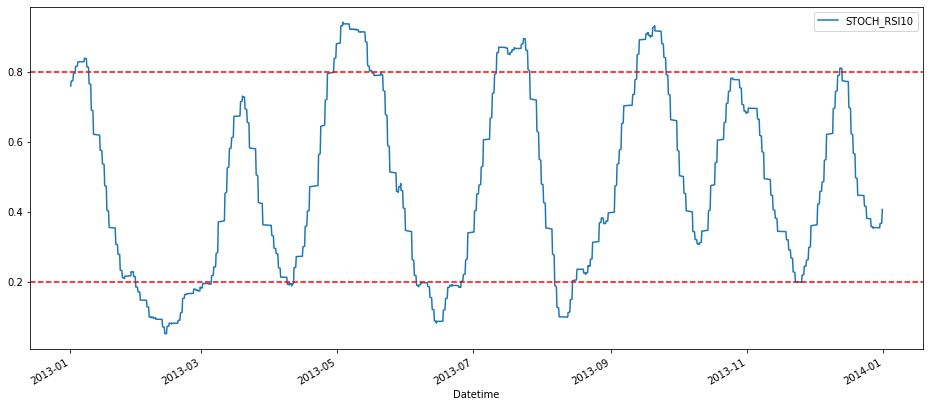

In [93]:
df[['STOCH_RSI10']].loc['2013'].plot(figsize=(16,7))
upper_thresh = 0.8
lower_thresh = 0.2


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

A StochRSI reading above 0.8 is considered overbought, while a reading below 0.2 is considered oversold. On the zero to 100 scale, above 80 is overbought, and below 20 is oversold.
Overbought doesn't necessarily mean the price will reverse lower, just like oversold doesn't mean the price will reverse higher. Rather the overbought and oversold conditions simply alert traders that the RSI is near the extremes of its recent readings.

When the StochRSI is above 0.50, the security may be seen as trending higher and vice versa when it's below 0.50.

One downside to using the StochRSI is that it tends to be quite volatile, rapidly moving from high to low. Smoothing the StochRSI may help in this regard. Some traders will take a moving average of the StochRSI to reduce the volatility and make the indicator more useful. For example, a 10-day simple moving average of the StochRSI can produce an indicator that's much smoother and more stable.

### TSI(True Strength Indicator) vs Close Price

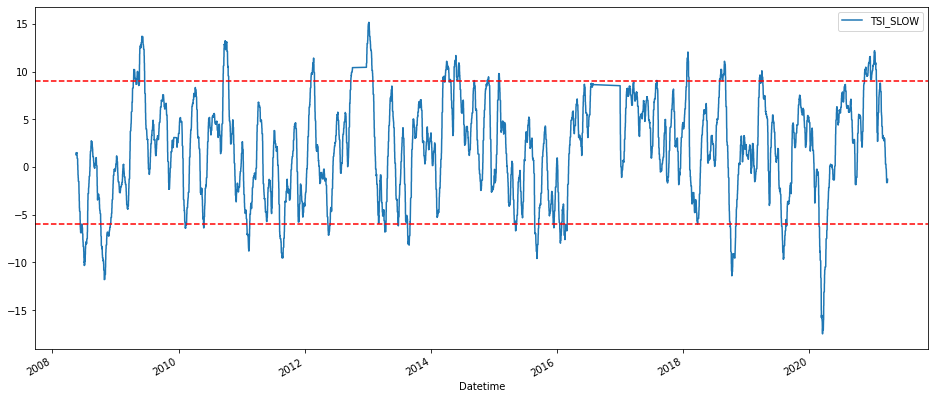

In [117]:
df[['TSI_SLOW']].plot(figsize=(16,7))
upper_thresh = 9
lower_thresh = -6


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

In the above graph, we don't see any significant dip during 2016 because the general trend of nifty was upward throughout both years, where as in 2020 we see a significant dip when the market crashed unexpectedly due to the covid crisis.

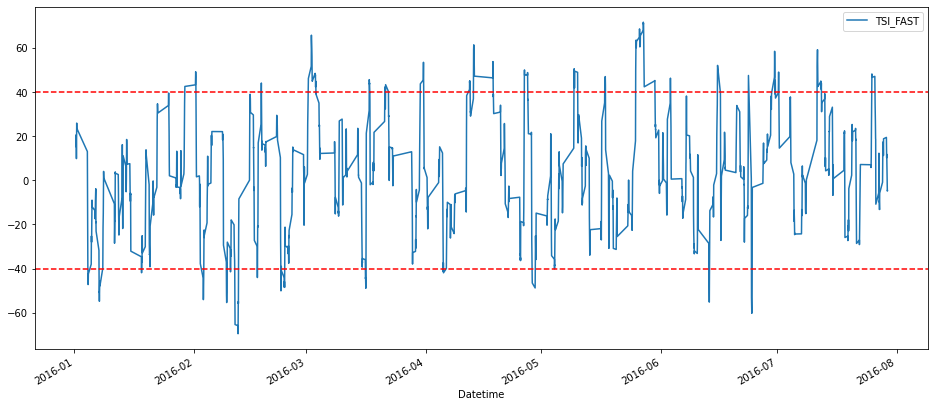

In [111]:
df[['TSI_FAST']].loc['2016'].plot(figsize=(16,7))
upper_thresh = 40
lower_thresh = -40


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

Mark extreme TSI levels, on the asset being traded, to see where overbought and oversold is. Being oversold doesn't necessarily mean it is time to buy, and when an asset is overbought it doesn't necessarily mean it is time to sell. Traders will typically watch for other signals to trigger a trade decision. For example, they may wait for the price or TSI to start dropping before selling in overbought territory.

### WRI (Williams R Indicator) vs Close Price

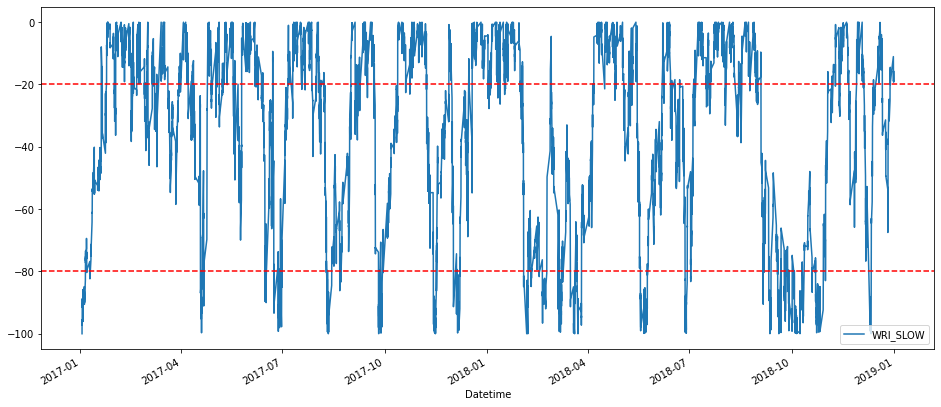

In [126]:
df[['WRI_SLOW']].loc['2017':'2018'].plot(figsize=(16,7))
upper_thresh = -20
lower_thresh = -80


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

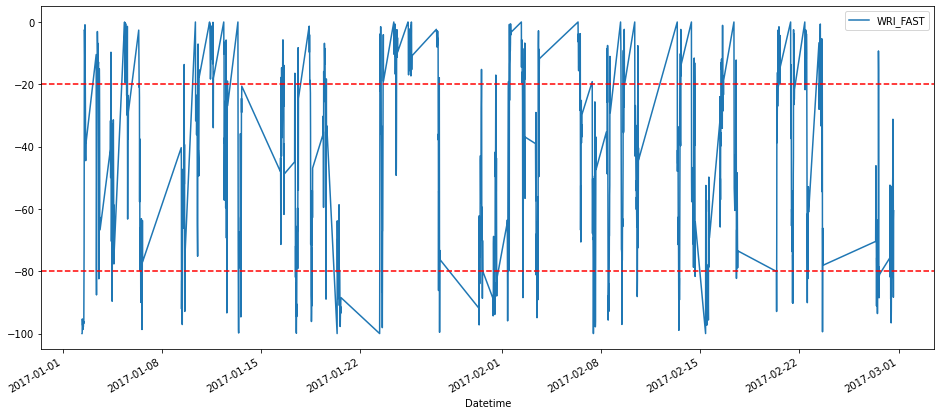

In [129]:
df[['WRI_FAST']].loc['2017-01':'2017-02'].plot(figsize=(16,7))
upper_thresh = -20
lower_thresh = -80


plt.axhline(upper_thresh, 0, 1,c = "red",linestyle='--')
plt.axhline(lower_thresh, 0, 1,c = "red",linestyle='--')
plt.show()

When the indicator is between -20 and zero the price is overbought, or near the high of its recent price range. When the indicator is between -80 and -100 the price is oversold, or far from the high of its recent range.

During an uptrend, traders can watch for the indicator to move below -80. When the price starts moving up, and the indicator moves back above -80, it could signal that the uptrend in price is starting again.

The same concept could be used to find short trades in a downtrend. When the indicator is above -20, watch for the price to start falling along with the Williams %R moving back below -20 to signal a potential continuation of the downtrend.

Traders can also watch for momentum failures. During a strong uptrend, the price will often reach -20 or above. If the indicator falls, and then can't get back above -20 before falling again, that signals that the upward price momentum is in trouble and a bigger price decline could follow.

The same concept applies to a downtrend. Readings of -80 or lower are often reached. When the indicator can no longer reach those low levels before moving higher it could indicate the price is going to head higher.

### ATR (Average True Range) vs Close Price

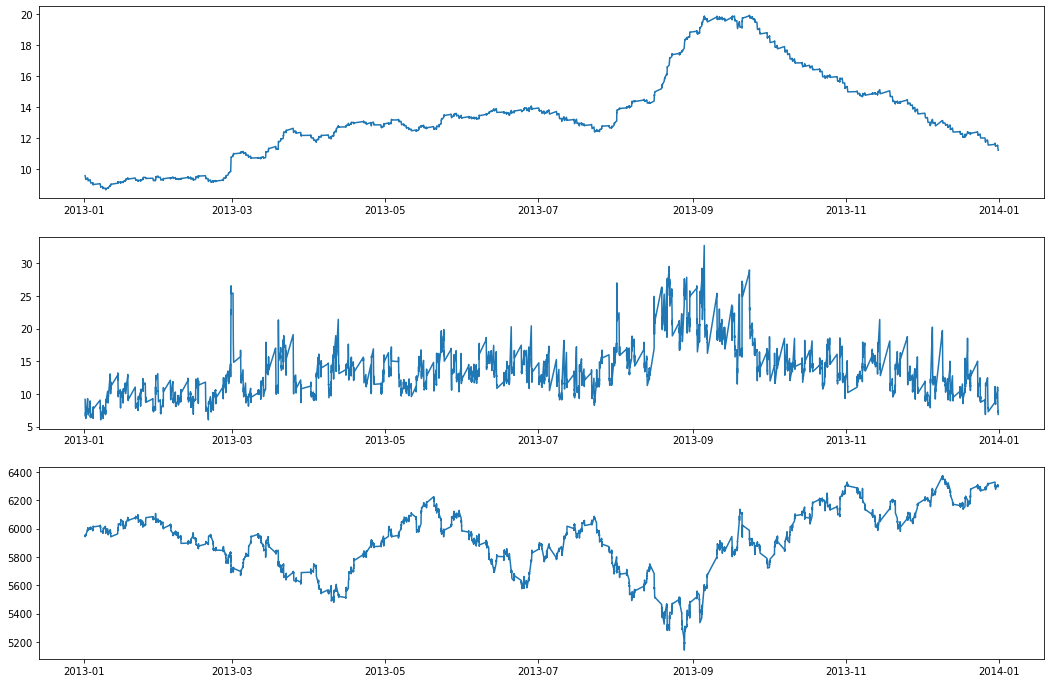

In [139]:
fig = plt.figure(figsize = (18,12))
ax1, ax2, ax3 = fig.subplots(3, 1)
ax1.plot(df.loc['2013'][['ATR']])
ax2.plot(df.loc['2013'][['ATR2']])
ax3.plot(df.Close.loc['2013'])

The logic behind these signals is that whenever a price closes more than an ATR above the most recent close a change in volatility has occurred. Taking a long position is betting that the stock will follow through in the upward direction.

There are two main limitations to using the ATR indicator. The first is that ATR is a subjective measure, meaning that it is open to interpretation. There is no single ATR value that will tell you with any certainty that a trend is about to reverse or not. Instead, ATR readings should always be compared against earlier readings to get a feel of a trend's strength or weakness.

Second, ATR only measures volatility and not the direction of an asset's price. This can sometimes result in mixed signals, particularly when markets are experiencing pivots or when trends are at turning points. For instance, a sudden increase in the ATR following a large move counter to the prevailing trend may lead some traders to think the ATR is confirming the old trend; however, this may not actually be the case.

### DC (Donchian Channel) on Close Price

In [163]:
data = df.loc['2019-01':'2019-05'].copy()

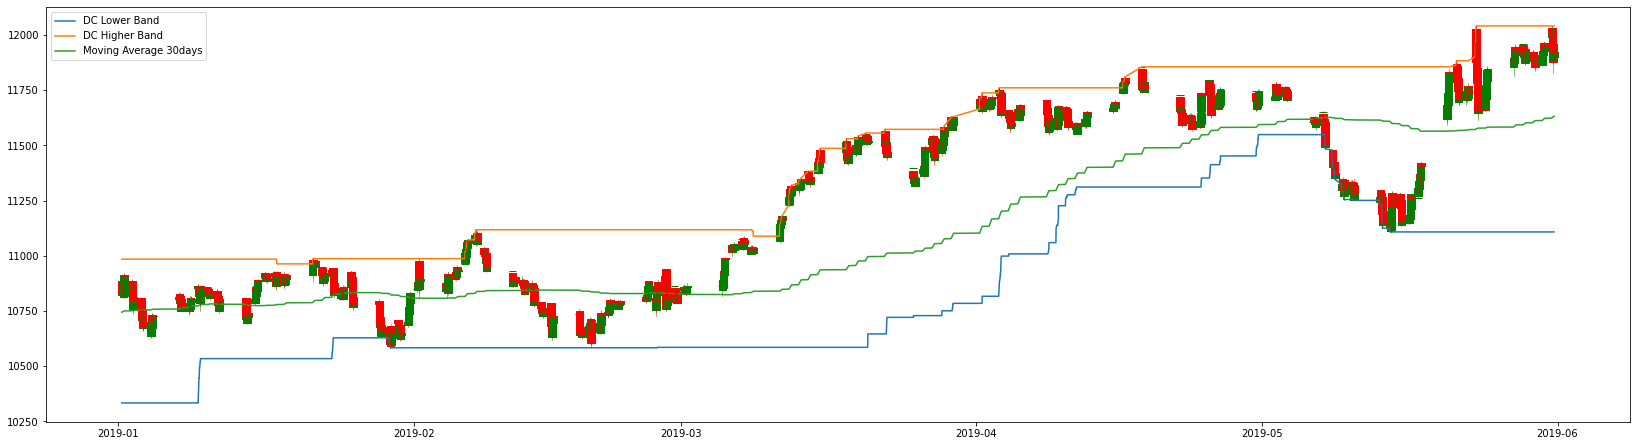

In [164]:
fig = plt.figure(figsize=(22,18))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ax_candle.xaxis_date()
ohlc = []
for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])
    
ax_candle.plot(data.index, data["DC_LB"], label="DC Lower Band")
ax_candle.plot(data.index, data["DC_HB"], label="DC Higher Band")
ax_candle.plot(data.index, data["ma30"], label="Moving Average 30days")
candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
ax_candle.legend()

Well, the most common approach is to regard a breakout above the upper band as a positive signal, and a breakout below the lower band as a signal to go short.

There are several ways that you can go about to exit a trade following a breakout trade. Here follow three of the most commonly used approaches:

**Trailing stops** – Some traders will insist that the best way to catch the trend that follows a breakout, is to use a trailing stop that trails the price. This way you attempt to milk the trend for as long as possible and try to catch the bigger moves of the market. With the help of a trailing stop consisting of a moving average, we can manage to stay in the trend until its end.

**Time Exit**- You may also use a simple time exit that will get you out of the market after a specific number of bars. While being an incredibly simple exit, this is something that works extremely well in some cases.

I recommend that you try to get an idea about the average duration of a trend in your market, and then use that measure to find out when it usually is time to get out of a trade. It doesn’t need to be very exact, the important thing is that you have some estimation of how long a trend tends to persist in your market!

**Stop Loss and Profit Target**- This is another common approach that we can use, and simply means that we place a stop loss and a profit target. Then our exit will be determined by which one of the two levels that’s hit first.

### Aroon Indicator

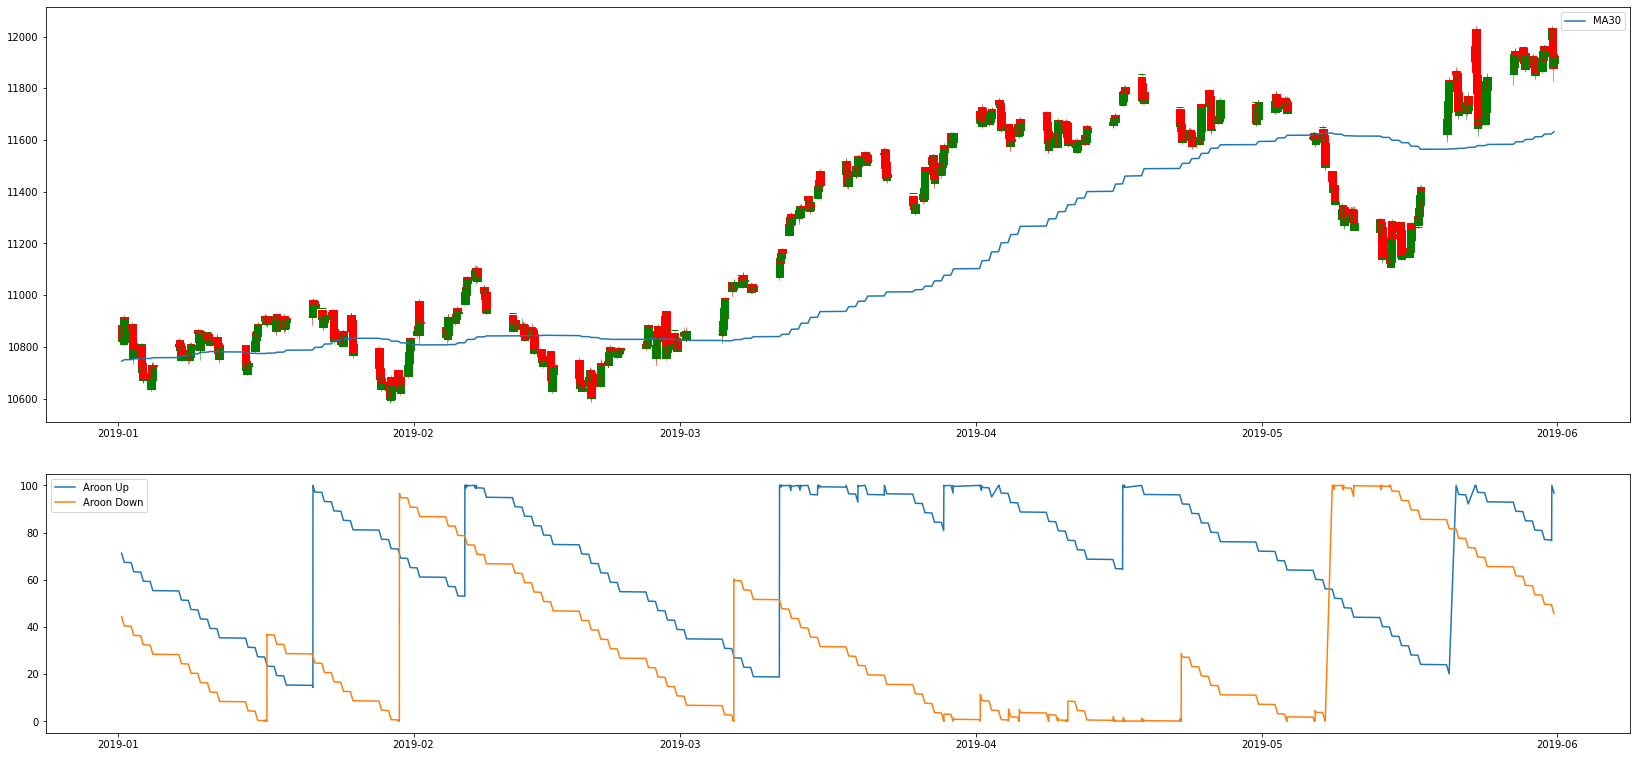

In [167]:
fig = plt.figure(figsize=(22,18))
ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
ax_aroon = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    
# Format x-axis ticks as dates
ax_candle.xaxis_date()
    
# Get nested list of date, open, high, low and close prices
ohlc = []
for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])
 
 # Plot candlestick chart
ax_candle.plot(data.index, data["ma30"], label="MA30")
candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
ax_candle.legend()
    
# Plot MACD
ax_aroon.plot(data.index, data["AI_U"], label="Aroon Up")
#ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
ax_aroon.plot(data.index, data["AI_D"], label="Aroon Down")
ax_aroon.legend()

The lower the Aroon Up, the weaker the uptrend and the stronger the downtrend, and vice versa. The main assumption underlying this indicator is that a stock's price will close regularly at new highs during an uptrend, and regularly make new lows in a downtrend.

Crossovers can signal entry or exit points. Up crossing above Down can be a signal to buy. Down crossing below Up may be a signal to sell.

When both indicators are below 50 it can signal that the price is consolidating. New highs or lows are not being created. Traders can watch for breakouts as well as the next Aroon crossover to signal which direction price is going.



In [168]:
def plot_chart(data, n):
    
    # Filter number of observations to plot
    data = data.iloc[-n:]
    
    # Create figure and set axes for subplots
    fig = plt.figure()
    fig.set_size_inches((20, 16))
    ax_candle = fig.add_axes((0, 0.72, 1, 0.32))
    ax_macd = fig.add_axes((0, 0.48, 1, 0.2), sharex=ax_candle)
    ax_rsi = fig.add_axes((0, 0.24, 1, 0.2), sharex=ax_candle)
    
    # Format x-axis ticks as dates
    ax_candle.xaxis_date()
    
    # Get nested list of date, open, high, low and close prices
    ohlc = []
    for date, row in data.iterrows():
        openp, highp, lowp, closep = row[:4]
        ohlc.append([date2num(date), openp, highp, lowp, closep])
 
    # Plot candlestick chart
    ax_candle.plot(data.index, data["ma7"], label="MA7")
    ax_candle.plot(data.index, data["ma30"], label="MA30")
    candlestick_ohlc(ax_candle, ohlc, colorup="g", colordown="r", width=0.8)
    ax_candle.legend()
    
    # Plot MACD
    ax_macd.plot(data.index, data["macd"], label="macd")
    #ax_macd.bar(data.index, data["macd_hist"] * 3, label="hist")
    ax_macd.plot(data.index, data["signal"], label="signal")
    ax_macd.legend()
    
    # Plot RSI
    # Above 70% = overbought, below 30% = oversold
    ax_rsi.set_ylabel("(%)")
    ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
    ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
    ax_rsi.plot(data.index, data["RSI"], label="rsi")
    ax_rsi.legend()
    
    # Save the chart as PNG
    #fig.savefig("charts/Nifty.png", bbox_inches="tight")
    
    plt.show()


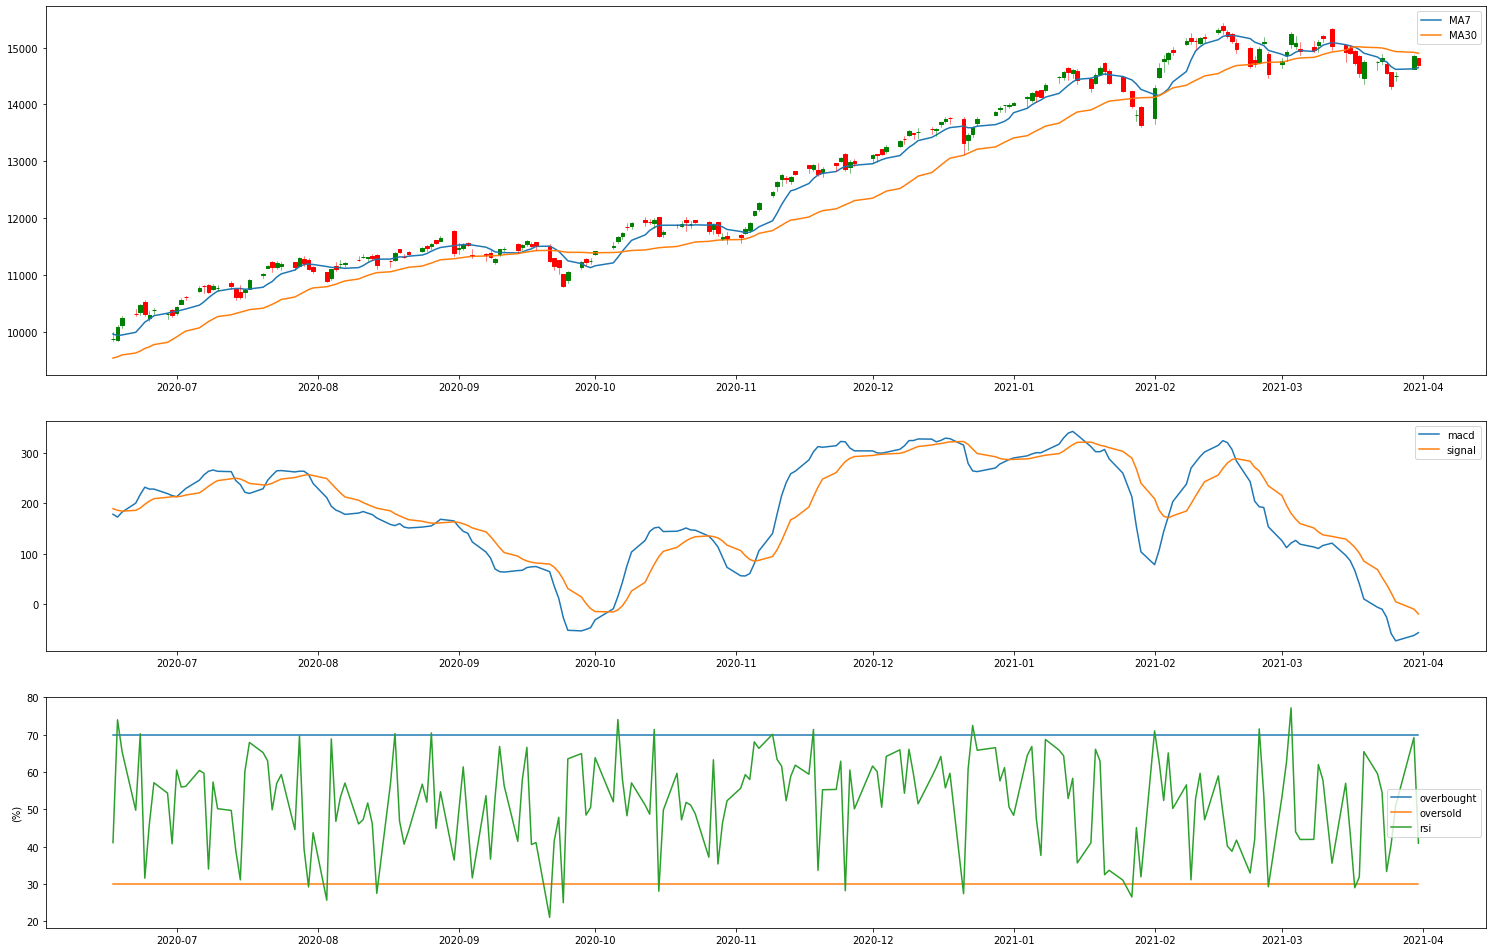

In [169]:
from matplotlib.pylab import date2num
from mplfinance.original_flavor import candlestick_ohlc
def Indicators_resample(df,freq):
    sample = df.copy()
    d = pd.DataFrame(index = sample.resample(freq).last().dropna().index)
    d["Open"] = sample.resample(freq).first().dropna().Open
    d["High"] = sample.resample(freq).max().dropna().High
    d["Low"] = sample.resample(freq).min().dropna().Low
    d["Close"] = sample.resample(freq).last().dropna().Close
    d["macd"] = sample.resample(freq).last().dropna().macd
    d["RSI"] = sample.resample(freq).last().dropna().RSI
    d["signal"] = sample.resample(freq).last().dropna().signal
    d["ma7"] = sample.resample(freq).last().dropna().ma7
    d["ma30"] = sample.resample(freq).last().dropna().ma30
    return d
daily = Indicators_resample(df,'1D')
plot_chart(daily, 200)